In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tiles import domino

In [2]:
phi = {}
for i in range(10):
    phi[i] = [i, i]
cnt = 10
for s in range(2):
    for i in range(10):
        for j in range(10):
            if j > i:
                if s == 0:
                    phi[cnt] = [i,j]
                else:
                    phi[cnt] = [j,i]
                cnt += 1

In [7]:
sol = [line for line in open("sol.txt")]
imax = 176
jmax = 120
horz = []
vert = []
read_horz = False
read_vert = False
for l in sol:
    if read_horz:
        if l.strip() == "Vertical":
            read_horz = False
            read_vert = True
        else:
            i = int(l.split(":")[1].split(",")[0].strip())
            j = int(l.split(":")[2].split(",")[0].strip())
            k1 = int(l.split(":")[3].split(",")[0].strip())
            k2 = int(l.split(":")[4].split(",")[0].strip())
            horz.append([i,j,k1,k2])
    elif read_vert:
        if l.strip() == "Horizontal":
            read_horz = True
            read_vert = False
        else:
            i = int(l.split(":")[1].split(",")[0].strip())
            j = int(l.split(":")[2].split(",")[0].strip())
            k1 = int(l.split(":")[3].split(",")[0].strip())
            k2 = int(l.split(":")[4].split(",")[0].strip())
            vert.append([i,j,k1,k2])
    else:
        if l.strip() == "Horizontal":
            read_horz = True
        if l.strip() == "Vertical":
            read_vert = True

In [8]:
plt.figure(figsize=(10,20))
#background = Image.new('RGBA', (120*40, 120*40), (255, 255, 255, 255))
background = Image.new('RGBA', (176*40, 120*40), (255, 255, 255, 255))
for n in horz:
    d = domino(375, 750)
    d.add_dots(n[2],n[3])
    background.paste(d.image.resize((40,80),Image.ANTIALIAS).rotate(90, expand=True), (40*(n[0]),40*n[1]))
for n in vert:
    d = domino(375, 750)
    d.add_dots(n[2],n[3])
    background.paste(d.image.resize((40,80),Image.ANTIALIAS), (40*(n[0]),40*n[1]))
#plt.imshow(background)
#background.rotate(-90, expand=True).save("penny.png")

<Figure size 720x1440 with 0 Axes>

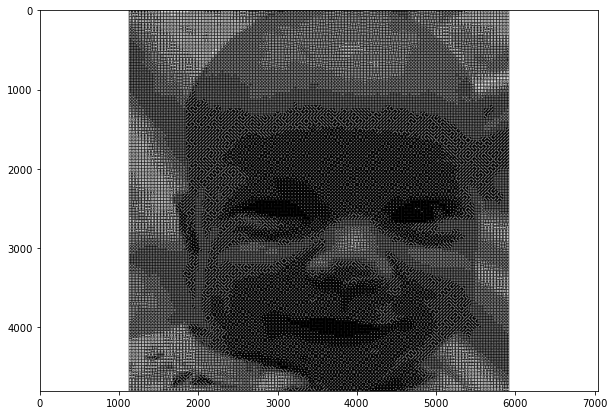

In [9]:
plt.figure(figsize=(10,20))
plt.imshow(background.rotate(-90))

In [10]:
background.rotate(-90, expand=True).save("mary.png")